In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import random
import copy
import time
from tqdm import tqdm

In [2]:
G = nx.read_gml('Data_Set/dolphins.gml')

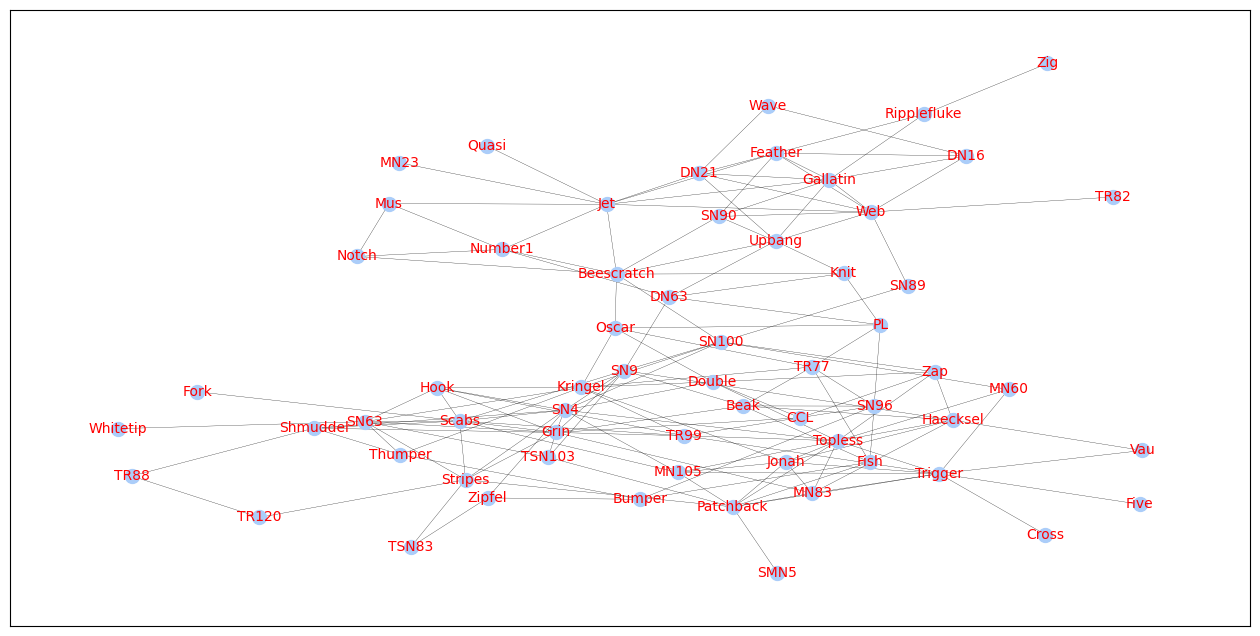

In [3]:
plt.figure(figsize=(16,8))
nx.draw_networkx(G,pos=nx.kamada_kawai_layout(G),node_size=100,font_size=10,font_color='red',node_color='#abcdf9',width=0.2)

# MÉTODO DE PARADA MANUAL

In [4]:
def node_verification(positions,node_list):
    nodes = []
    for i in positions:
        nodes.append(node_list[i])
    ocorrencias_por_elemento = {elem: nodes.count(elem) for elem in set(nodes)}
    
    maior_valor = max(ocorrencias_por_elemento.values())
    chaves_maiores_valores = [chave for chave, valor in ocorrencias_por_elemento.items() if valor == maior_valor]
    node = random.choice(chaves_maiores_valores)
    return node

In [5]:
df = nx.to_pandas_adjacency(G)

epocas = 0

report = pd.DataFrame(columns=['Época', 'Nº Clusters', 'Clusters Names', 'Clusters Sizes','Node List'])


for test in tqdm(range(50)):
    node_list = df.index.tolist()
    epocas += 2
    for i in range(epocas):
        new_node_list = []
        for linha in range(62):
            lista = nx.to_numpy_array(G)[linha].tolist()
            positions = [i for i, valor in enumerate(lista) if valor == 1]
            node = node_verification(positions,node_list)

            new_node_list.append(node)
        node_list = new_node_list

    lista_aux = copy.copy(node_list)
    
    number_clusters = len((pd.Series(lista_aux)).value_counts())
    clusters_names = (pd.Series(lista_aux)).value_counts().index.tolist()
    clusters_size  = (pd.Series(lista_aux)).value_counts().tolist()
    
    report.loc[len(report)] = [epocas, number_clusters, clusters_names, clusters_size, lista_aux]

    

100%|███████████████████████████████████████████| 50/50 [00:28<00:00,  1.74it/s]


In [6]:
report

,Época,Nº Clusters,Clusters Names,Clusters Sizes,Node List
0,2,31,"[Zap, Scabs, SN4, TR99, Number1, Upbang, DN16,...","[6, 5, 5, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[TR99, Mus, TSN83, Zap, MN105, DN16, DN16, DN6..."
1,4,15,"[Scabs, Stripes, Upbang, DN63, Trigger, Five, ...","[12, 10, 10, 5, 5, 4, 4, 3, 2, 2, 1, 1, 1, 1, 1]","[Scabs, DN63, Stripes, Scabs, Five, Upbang, Up..."
2,6,5,"[Grin, Jet, TR77, MN60, SN63]","[31, 22, 5, 2, 2]","[Grin, Jet, TR77, Grin, MN60, Jet, Jet, Jet, G..."
3,8,11,"[Topless, Feather, SN63, Beak, Jet, SN90, Patc...","[15, 11, 9, 5, 5, 4, 4, 4, 3, 1, 1]","[Beak, Feather, Beak, Haecksel, Topless, SN90,..."
4,10,6,"[Trigger, Number1, SN63, Feather, Ripplefluke,...","[25, 11, 10, 7, 5, 4]","[SN63, Number1, SN63, Trigger, Trigger, Ripple..."
5,12,5,"[Grin, Trigger, DN21, Web, PL]","[31, 12, 8, 7, 4]","[Grin, PL, Grin, Grin, Trigger, DN21, DN21, PL..."
6,14,6,"[MN105, Feather, Shmuddel, TR77, Grin, Jet]","[18, 15, 10, 8, 7, 4]","[TR77, Feather, TR77, MN105, MN105, Feather, F..."
7,16,3,"[Beak, Web, Zap]","[29, 21, 12]","[Beak, Web, Beak, Beak, Zap, Web, Web, Web, Be..."
8,18,4,"[Gallatin, Scabs, Jonah, Patchback]","[20, 20, 15, 7]","[Patchback, Gallatin, Patchback, Jonah, Jonah,..."
9,20,5,"[Scabs, Feather, Haecksel, Upbang, Beak]","[22, 15, 12, 7, 6]","[Beak, Feather, Beak, Scabs, Haecksel, Upbang,..."


In [7]:
cores = list(mcolors.CSS4_COLORS.keys())
random.shuffle(cores)
nodes = list(set(report['Node List'].iloc[2]))
lista_cores = copy.copy(report['Node List'].iloc[2])
for j in range(len(nodes)):
    for i in range(len(lista_cores)):
        if lista_cores[i] == nodes[j]:
            lista_cores[i] = cores[j]

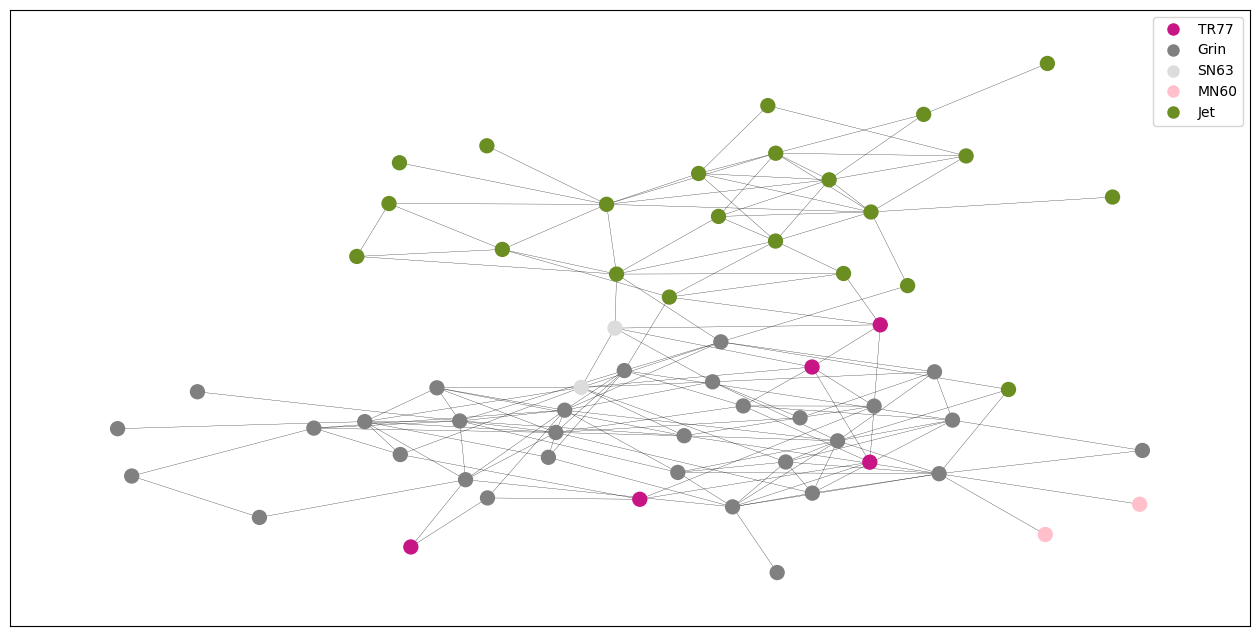

In [8]:
plt.figure(figsize=(16,8))
nx.draw_networkx(G,pos=nx.kamada_kawai_layout(G),node_size=100,font_size=10,font_color='red',node_color=lista_cores,width=0.2,with_labels=False)
legenda = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cores[i], markersize=10, label=nodes[i]) for i in range(len(nodes))]
plt.legend(handles=legenda, loc='upper right')
plt.show()

# MÉTODO DE PARADA PELA QUANTIDA DE CLUSTERS

In [9]:
len(df)

62

In [10]:
df = nx.to_pandas_adjacency(G)
stop = 0
report  = pd.DataFrame(columns=['Parada','Época', 'Nº Clusters', 'Clusters Names', 'Clusters Sizes','Node List'])
for test in range(20):
    node_list = df.index.tolist()
    stop_count = 0
    epoca = 0
    stop += 1
    while True:
        epoca += 1
        clusters = len(pd.Series(node_list).value_counts())
        new_node_list = []
        for linha in range(62):
            lista = nx.to_numpy_array(G)[linha].tolist()
            positions = [i for i, valor in enumerate(lista) if valor == 1]
            node = node_verification(positions,node_list)

            new_node_list.append(node)
        node_list = new_node_list
        current_clusters = len(pd.Series(node_list).value_counts())

        if clusters == current_clusters:
            stop_count += 1
        else:
            stop_count = 0

        if stop_count == stop:
            break
        
    lista_aux = copy.copy(node_list)

    number_clusters = len((pd.Series(lista_aux)).value_counts())
    clusters_names = (pd.Series(lista_aux)).value_counts().index.tolist()
    clusters_size  = (pd.Series(lista_aux)).value_counts().tolist()
    
    report.loc[len(report)] = [stop,epoca, number_clusters, clusters_names, clusters_size, lista_aux]

In [11]:
report

,Parada,Época,Nº Clusters,Clusters Names,Clusters Sizes,Node List
0,1,7,7,"[Jet, SN63, Jonah, SN9, Beescratch, Grin, TR88]","[17, 17, 16, 6, 3, 2, 1]","[SN9, Jet, Grin, Jonah, Jonah, Jet, Jet, Jet, ..."
1,2,9,5,"[Topless, Feather, Jet, Upbang, PL]","[42, 8, 7, 3, 2]","[Topless, Upbang, Topless, Topless, Topless, F..."
2,3,13,2,"[SN4, DN21]","[41, 21]","[SN4, DN21, SN4, SN4, SN4, DN21, DN21, DN21, S..."
3,4,15,3,"[MN83, Gallatin, Jet]","[41, 11, 10]","[MN83, Jet, MN83, MN83, MN83, Gallatin, Gallat..."
4,5,20,5,"[Web, SN100, SN4, Shmuddel, SN96]","[21, 19, 9, 7, 6]","[SN96, Web, SN96, SN100, SN100, Web, Web, Web,..."
5,6,14,4,"[Shmuddel, Jet, MN105, Gallatin]","[30, 13, 12, 7]","[Shmuddel, Jet, Shmuddel, Shmuddel, MN105, Jet..."
6,7,18,4,"[MN105, Jet, TR99, Web]","[30, 13, 12, 7]","[MN105, Jet, TR99, MN105, MN105, Jet, Jet, Jet..."
7,8,16,2,"[Trigger, Gallatin]","[42, 20]","[Trigger, Gallatin, Trigger, Trigger, Trigger,..."
8,9,28,4,"[Grin, MN83, DN16, Feather]","[32, 12, 11, 7]","[Grin, Grin, Grin, Grin, MN83, DN16, DN16, Gri..."
9,10,18,5,"[Gallatin, TR99, MN105, SN4, Fish]","[21, 15, 11, 9, 6]","[Fish, Gallatin, Fish, MN105, TR99, Gallatin, ..."


In [12]:
cores = list(mcolors.CSS4_COLORS.keys())
random.shuffle(cores)
nodes = list(set(lista_aux))
lista_cores = copy.copy(lista_aux)
for j in range(len(nodes)):
    for i in range(len(lista_cores)):
        if lista_cores[i] == nodes[j]:
            lista_cores[i] = cores[j]

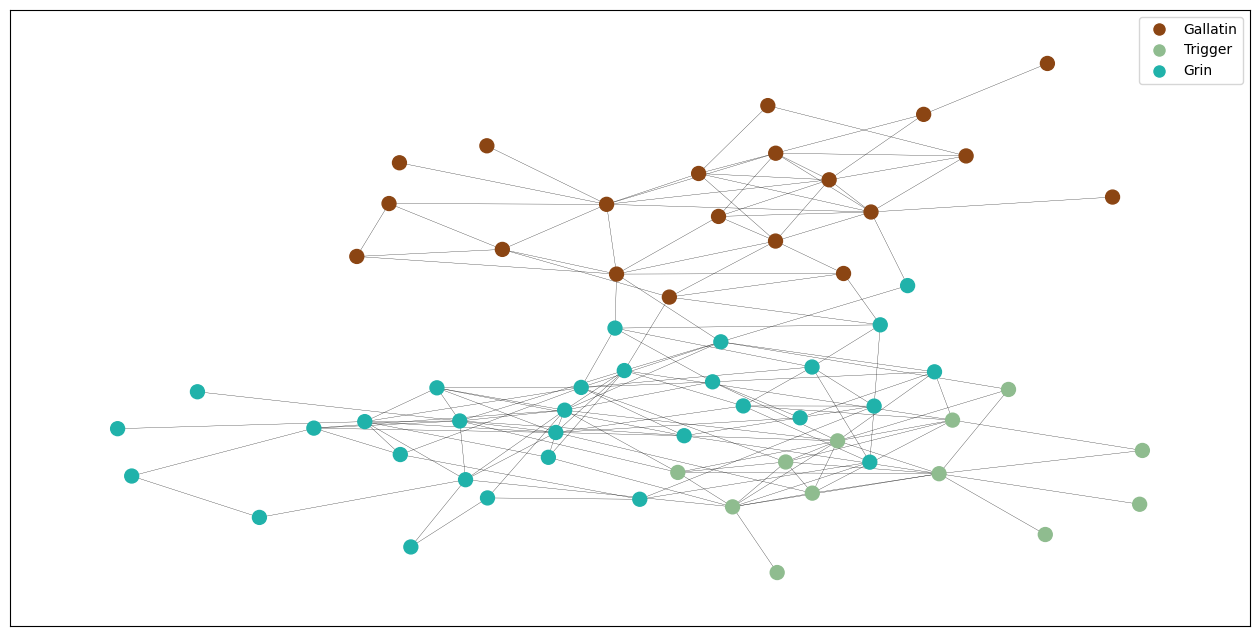

In [13]:
plt.figure(figsize=(16,8))
nx.draw_networkx(G,pos=nx.kamada_kawai_layout(G),node_size=100,font_size=10,font_color='red',node_color=lista_cores,width=0.2,with_labels=False)
legenda = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cores[i], markersize=10, label=nodes[i]) for i in range(len(nodes))]
plt.legend(handles=legenda, loc='upper right')
plt.show()

# MÉTODO DE PARADA PELA QUANTIDADE DE ELEMENTOS EM CADA CLUSTERS

In [14]:
node_list = df.index.tolist()

In [15]:
def node_dic(node_list):
    
    node_counts = {}
    for i in node_list:
        if i in node_counts:
            node_counts[i] += 1
        else:
            node_counts[i] = 1
            
    return node_counts

In [16]:
limite_tempo = 5
report  = pd.DataFrame(columns=['Diferença','Época', 'Nº Clusters', 'Clusters Names', 'Clusters Sizes','Node List'])
stop_value = 1
tempo_inicio = time.time()
for n in range(20):
    node_list = df.index.tolist()
    stop = 0
    epoca = 0
    while True:
        epoca += 1
        node_counts = node_dic(node_list)
        new_node_list = []
        for linha in range(62):
            lista = nx.to_numpy_array(G)[linha].tolist()
            positions = [i for i, valor in enumerate(lista) if valor == 1]
            node = node_verification(positions,node_list)

            new_node_list.append(node)
        node_list = new_node_list
        
        current_node_counts = node_dic(node_list)
        
        largest_clusters = dict(sorted(node_counts.items(), key=lambda item: item[1], reverse=True))
        largest_current_clusters = dict(sorted(current_node_counts.items(), key=lambda item: item[1], reverse=True))
        
        
        if largest_clusters.keys() == largest_current_clusters.keys():
            validation = True
            for i in range(len(largest_clusters)):
                
                if abs(list(largest_clusters.values())[i] - list(largest_current_clusters.values())[i]) > stop_value:
                    stop = 0
                    validation = False
                    break
                
            if validation == True:
                stop += 1
                
        if stop >= 3:
            break
        
        lista_aux = copy.copy(node_list)
        if time.time() - tempo_inicio > limite_tempo:

         break
        
        
    number_clusters = len((pd.Series(lista_aux)).value_counts())
    clusters_names = (pd.Series(lista_aux)).value_counts().index.tolist()
    clusters_size  = (pd.Series(lista_aux)).value_counts().tolist()

    report.loc[len(report)] = [stop_value,epoca, number_clusters, clusters_names, clusters_size, lista_aux]
    stop_value += 1
    

In [17]:
report

,Diferença,Época,Nº Clusters,Clusters Names,Clusters Sizes,Node List
0,1,13,4,"[Patchback, Jet, Wave, Beescratch]","[43, 7, 7, 5]","[Patchback, Beescratch, Patchback, Patchback, ..."
1,2,14,3,"[Hook, Gallatin, Beescratch]","[43, 15, 4]","[Hook, Gallatin, Hook, Hook, Hook, Gallatin, G..."
2,3,50,2,"[SN63, Jet]","[40, 22]","[SN63, Jet, SN63, SN63, SN63, Jet, Jet, Jet, S..."
3,4,13,4,"[MN105, DN16, Upbang, Gallatin]","[43, 10, 5, 4]","[MN105, Gallatin, MN105, MN105, MN105, DN16, D..."
4,5,11,3,"[SN9, Web, Topless]","[39, 20, 3]","[SN9, Web, SN9, SN9, SN9, Web, Web, Web, SN9, ..."
5,6,13,2,"[Topless, Feather]","[42, 20]","[Topless, Feather, Topless, Topless, Topless, ..."
6,7,9,5,"[Hook, Gallatin, Patchback, SN96, Jet]","[23, 18, 12, 5, 4]","[SN96, Gallatin, SN96, Hook, Patchback, Gallat..."
7,8,11,5,"[Gallatin, Topless, Scabs, Beak, Shmuddel]","[21, 17, 11, 7, 6]","[Beak, Gallatin, Beak, Topless, Topless, Galla..."
8,9,13,2,"[Grin, Upbang]","[42, 20]","[Grin, Upbang, Grin, Grin, Grin, Upbang, Upban..."
9,10,9,5,"[Grin, Jet, Patchback, Web, Beescratch]","[33, 11, 9, 7, 2]","[Grin, Beescratch, Grin, Grin, Patchback, Jet,..."


In [18]:
report

,Diferença,Época,Nº Clusters,Clusters Names,Clusters Sizes,Node List
0,1,13,4,"[Patchback, Jet, Wave, Beescratch]","[43, 7, 7, 5]","[Patchback, Beescratch, Patchback, Patchback, ..."
1,2,14,3,"[Hook, Gallatin, Beescratch]","[43, 15, 4]","[Hook, Gallatin, Hook, Hook, Hook, Gallatin, G..."
2,3,50,2,"[SN63, Jet]","[40, 22]","[SN63, Jet, SN63, SN63, SN63, Jet, Jet, Jet, S..."
3,4,13,4,"[MN105, DN16, Upbang, Gallatin]","[43, 10, 5, 4]","[MN105, Gallatin, MN105, MN105, MN105, DN16, D..."
4,5,11,3,"[SN9, Web, Topless]","[39, 20, 3]","[SN9, Web, SN9, SN9, SN9, Web, Web, Web, SN9, ..."
5,6,13,2,"[Topless, Feather]","[42, 20]","[Topless, Feather, Topless, Topless, Topless, ..."
6,7,9,5,"[Hook, Gallatin, Patchback, SN96, Jet]","[23, 18, 12, 5, 4]","[SN96, Gallatin, SN96, Hook, Patchback, Gallat..."
7,8,11,5,"[Gallatin, Topless, Scabs, Beak, Shmuddel]","[21, 17, 11, 7, 6]","[Beak, Gallatin, Beak, Topless, Topless, Galla..."
8,9,13,2,"[Grin, Upbang]","[42, 20]","[Grin, Upbang, Grin, Grin, Grin, Upbang, Upban..."
9,10,9,5,"[Grin, Jet, Patchback, Web, Beescratch]","[33, 11, 9, 7, 2]","[Grin, Beescratch, Grin, Grin, Patchback, Jet,..."


In [19]:
cores = list(mcolors.CSS4_COLORS.keys())
random.shuffle(cores)
nodes = list(set(lista_aux))
lista_cores = copy.copy(node_list)
for j in range(len(nodes)):
    for i in range(len(lista_cores)):
        if lista_cores[i] == nodes[j]:
            lista_cores[i] = cores[j]

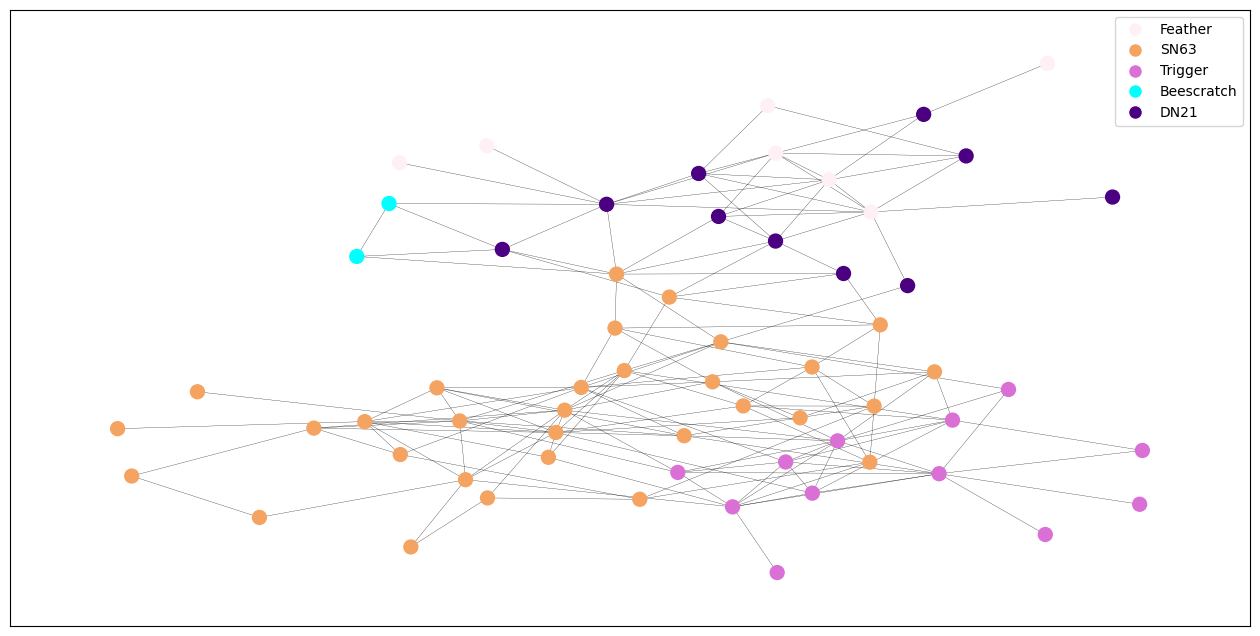

In [20]:
plt.figure(figsize=(16,8))
nx.draw_networkx(G,pos=nx.kamada_kawai_layout(G),node_size=100,font_size=10,font_color='red',node_color=lista_cores,width=0.2,with_labels=False)
legenda = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cores[i], markersize=10, label=nodes[i]) for i in range(len(nodes))]
plt.legend(handles=legenda, loc='upper right')
plt.show()

# POWER GRID

In [21]:
G = nx.read_gml('Data_Set/power.gml', label='id')

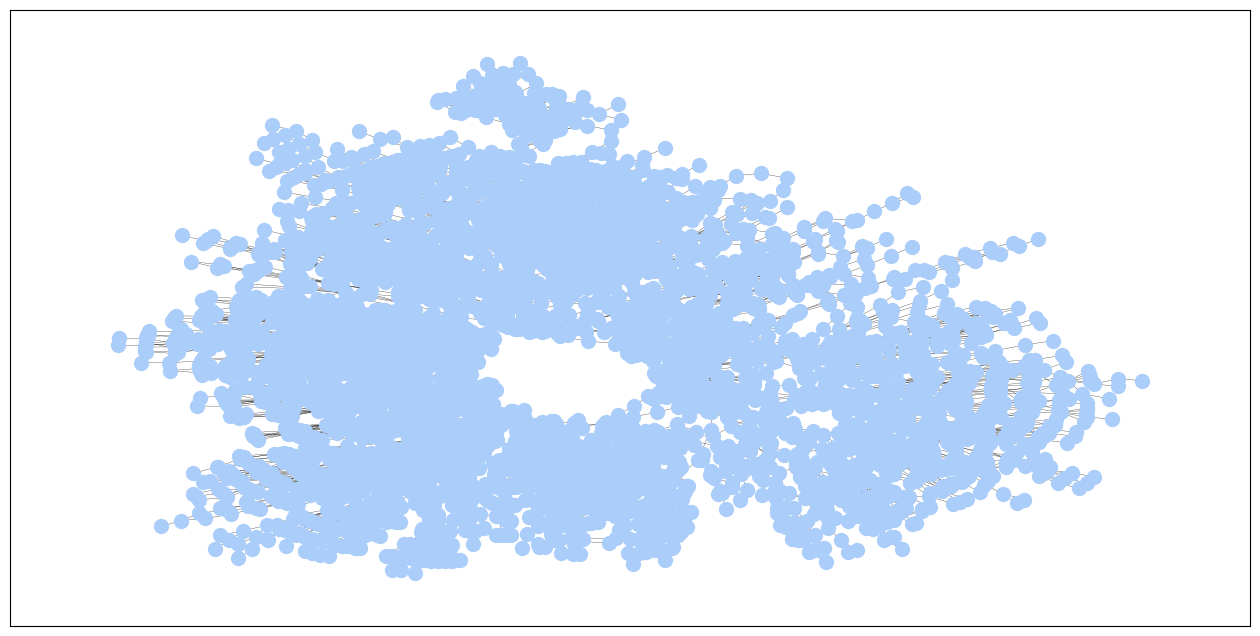

In [22]:
plt.figure(figsize=(16,8))
nx.draw_networkx(G,pos=nx.kamada_kawai_layout(G),node_size=100,node_color='#abcdf9',width=0.2, with_labels=False)

In [23]:
len(df)

62

In [26]:
df = nx.to_pandas_adjacency(G)

epocas = 5

report = pd.DataFrame(columns=['Época', 'Nº Clusters', 'Clusters Names', 'Clusters Sizes','Node List'])


for test in tqdm(range(10)):
    node_list = df.index.tolist()
    epocas += 2
    for i in range(100):
        new_node_list = []
        for linha in range(len(df)):
            lista = nx.to_numpy_array(G)[linha].tolist()
            positions = [i for i, valor in enumerate(lista) if valor == 1]
            node = node_verification(positions,node_list)

            new_node_list.append(node)
        node_list = new_node_list

    lista_aux = copy.copy(node_list)
    
    number_clusters = len((pd.Series(lista_aux)).value_counts())
    clusters_names = (pd.Series(lista_aux)).value_counts().index.tolist()
    clusters_size  = (pd.Series(lista_aux)).value_counts().tolist()
    
    report.loc[len(report)] = [epocas, number_clusters, clusters_names, clusters_size, lista_aux]

  0%|                                                    | 0/10 [01:10<?, ?it/s]


KeyboardInterrupt: 

TypeError: 'int' object is not iterable

In [ ]:
report

In [ ]:
df = nx.to_pandas_adjacency(G)
stop = 0
report  = pd.DataFrame(columns=['Parada','Época', 'Nº Clusters', 'Clusters Names', 'Clusters Sizes','Node List'])
for test in tqdm(range(10)):
    node_list = df.index.tolist()
    stop_count = 0
    epoca = 0
    stop += 1
    while True:
        epoca += 1
        clusters = len(pd.Series(node_list).value_counts())
        new_node_list = []
        for linha in range(len(df)):
            lista = nx.to_numpy_array(G)[linha].tolist()
            positions = [i for i, valor in enumerate(lista) if valor == 1]
            node = node_verification(positions,node_list)

            new_node_list.append(node)
        node_list = new_node_list
        current_clusters = len(pd.Series(node_list).value_counts())

        if clusters == current_clusters:
            stop_count += 1
        else:
            stop_count = 0

        if stop_count == stop:
            break
        
    lista_aux = copy.copy(node_list)

    number_clusters = len((pd.Series(lista_aux)).value_counts())
    clusters_names = (pd.Series(lista_aux)).value_counts().index.tolist()
    clusters_size  = (pd.Series(lista_aux)).value_counts().tolist()
    
    report.loc[len(report)] = [stop,epoca, number_clusters, clusters_names, clusters_size, lista_aux]

KeyboardInterrupt: 

In [ ]:
report